In [1]:
!pip install streamlit -q

In [2]:
%%writefile diabeticapp.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import streamlit as st

# load the dataset
df=pd.read_csv('diabetes.csv')
df.head()

df.info()
df.isnull().sum()
df.describe()
df['Outcome'].value_counts()

# Visualization
df.groupby('Outcome').mean().plot(kind="bar")
df.groupby('Outcome')['Pregnancies'].mean().plot(kind="bar")
df.pivot_table(index='Outcome', columns='Pregnancies', values='Age', aggfunc='mean').fillna(0)

# Separate Features and Target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9,stratify=y)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

array=np.array([[5,17,19,32,87,54,67,25.6]]).reshape(1,-1)

pred_array=model.predict(array)
if pred_array[0]==0:
  print("The person is not diabetic")
else:
  print("The person is diabetic")

def main():
  st.title("Diabetics Prediction for number of pregnancies")
  pregnancies=st.text_input("Num of pregnancies")
  glucose=st.text_input("Enter the Glucose level")
  blood_pressure=st.text_input("Enter the Blood Pressure")
  skin_thickness=st.text_input("Enter the Skin Thickness")
  insulin=st.text_input("Enter the Insulin")
  BMI=st.text_input("Enter the BMI")
  Diabetes_Pedigree_Function=st.text_input("Enter the Diabetes Pedigree Function")
  age=st.text_input("Enter the Age")

  diagnosis=" "

  if st.button("diabets test results"):
    #input_data = np.array([[float(pregnancies), float(glucose), float(blood_pressure),
    #      float(skin_thickness), float(insulin), float(BMI), float(Diabetes_Pedigree_Function),
    #      float(age)]])
    diagnosis=model.predict([[pregnancies,glucose,blood_pressure,skin_thickness,insulin,BMI,Diabetes_Pedigree_Function,age]])
    #diagnosis=model.predict(input_data)
    if diagnosis[0]==0:
      diagnosis="The person is not diabetic"
    else:
      diagnosis="The person is diabetic"
    st.success(diagnosis)

main()

Writing diabeticapp.py


In [3]:
!npm install -g cloudflared

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
changed 1 package in 3s
⠦

In [4]:
!streamlit run diabeticapp.py &>/content/logs.txt &

In [5]:
!cloudflared tunnel --url http://localhost:8501

2026-02-24T13:44:27Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2026-02-24T13:44:27Z INF Requesting new quick Tunnel on trycloudflare.com...
2026-02-24T13:44:30Z INF +--------------------------------------------------------------------------------------------+
2026-02-24T13:44:30Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2026-02-24T13:44:30Z INF |  https://tracked-running-and-athletes.trycloudflare.co

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [ ]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in cols:
    df[i] = df[i].replace(0, df[i].median())

In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


<Axes: xlabel='Outcome'>

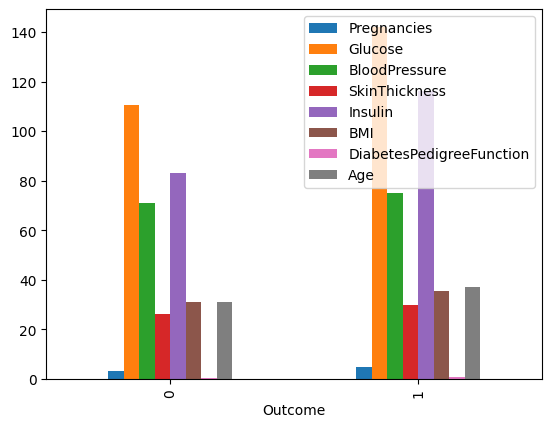

In [ ]:
df.groupby('Outcome').mean().plot(kind="bar")

<Axes: xlabel='Outcome'>

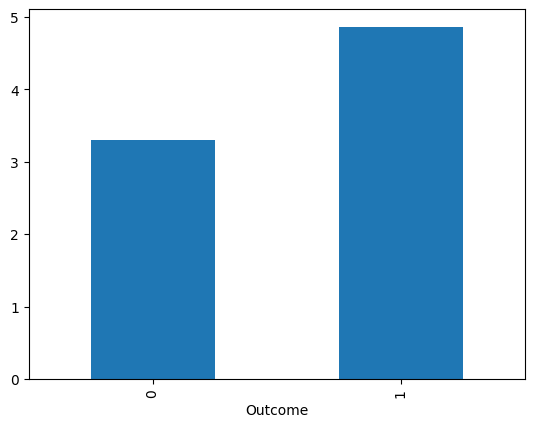

In [ ]:
df.groupby('Outcome')['Pregnancies'].mean().plot(kind="bar")

In [ ]:
df.pivot_table(index='Outcome', columns='Pregnancies', values='Age', aggfunc='mean').fillna(0)

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,27.095890,25.254717,25.892857,28.770833,30.066667,39.416667,37.147059,42.5,49.625000,46.000000,43.357143,40.750000,48.2,46.8,0.0,0.0,0.0
1,28.578947,35.103448,32.947368,29.481481,38.086957,38.380952,44.000000,40.0,42.272727,43.166667,41.700000,46.714286,46.5,42.2,42.0,43.0,47.0


In [ ]:
#sns.boxplot(x='Outcome', y='Glucose', data=df)

In [ ]:
#sns.boxplot(x='Outcome', y='BMI', data=df)

In [ ]:
#sns.heatmap(df.corr(), annot=True)

In [ ]:
# Separate Features and Target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9,stratify=y)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [ ]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
# Train SVM Model
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#model=LogisticRegression()
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7922077922077922

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.71      0.69      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154


Confusion Matrix:
 [[85 15]
 [17 37]]


In [ ]:
arr=np.array([[6,148,72,35,0,33.6,0.627,50]])
array=np.array([[5,17,19,32,87,54,67,25.6]]).reshape(1,-1)
array

array([[ 5. , 17. , 19. , 32. , 87. , 54. , 67. , 25.6]])

In [ ]:
pred_array=model.predict(array)
if pred_array[0]==0:
  print("The person is not diabetic")
else:
  print("The person is diabetic")

The person is diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
